In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
df = pd.read_csv('insurance.csv')

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [88]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [89]:
df.shape

(1338, 7)

In [90]:
k = df.select_dtypes(include = 'number')

In [91]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

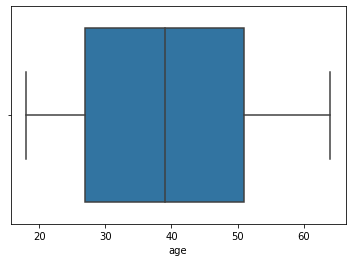

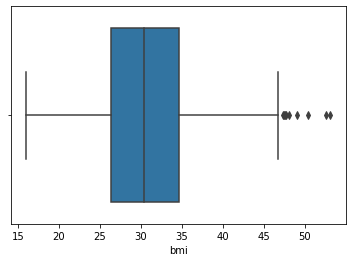

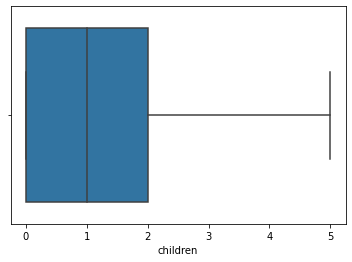

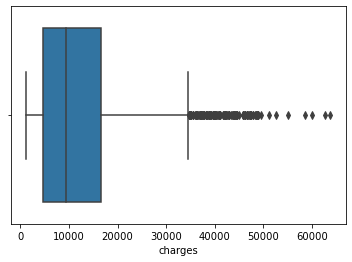

In [92]:
for col in k.columns.tolist():
    sns.boxplot(k[col])
    plt.show()

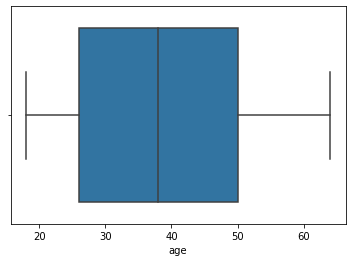

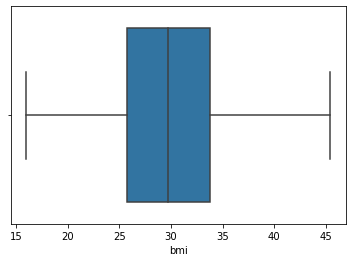

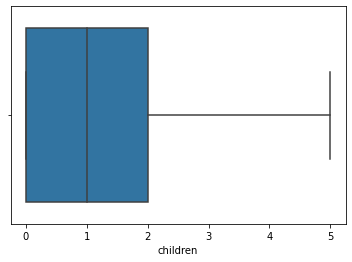

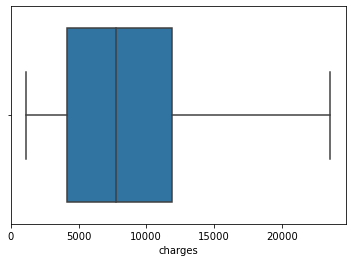

In [98]:
def out(col):
 q1 = df[col].quantile(0.25)
 q3 = df[col].quantile(0.75)
 IQR = q3-q1
 lb = q1-(1.5*IQR)

 ub = q3+(1.5*IQR)

 outliers = df[(df[col]<lb)|(df[col]>ub)].index
 return outliers
for i in k:
 df.drop(out(i),inplace=True)
 sns.boxplot(df[i])
 plt.show()

In [24]:
q1 = df['charges'].quantile(0.25)
q2 = df['charges'].quantile(0.50)
q3 = df['charges'].quantile(0.75)
IQR1 = q3 - q1
otn = q1 - (1.5)*IQR1
otp = q3 + (1.5)*IQR1
ot = df['charges'][(df['charges'] < otn) | (df['charges'] > otp)]

In [25]:
h = ot.index.tolist()

In [26]:
df.drop(h,inplace = True)

<AxesSubplot:xlabel='charges'>

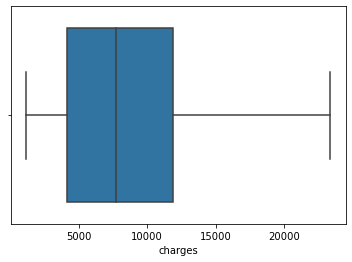

In [27]:
sns.boxplot(df['charges'])

In [32]:
q1 = df['bmi'].quantile(0.25)
q2 = df['bmi'].quantile(0.50)
q3 = df['bmi'].quantile(0.75)
IQR1 = q3 - q1
otn = q1 - (1.5)*IQR1
otp = q3 + (1.5)*IQR1
ot = df['bmi'][(df['bmi'] < otn) | (df['bmi'] > otp)]

In [33]:
h1 = ot.index.tolist()

In [34]:
df.drop(h1,inplace = True)

<AxesSubplot:xlabel='bmi'>

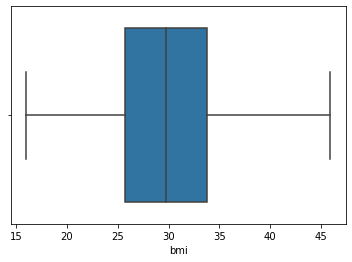

In [35]:
sns.boxplot(df['bmi'])

In [99]:
df.shape

(1105, 7)

In [100]:
y = df['charges']
X = df[['age','sex','bmi','children','smoker','region']]

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(884, 6) (884,)
(221, 6) (221,)


In [102]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,sex,smoker,region
747,male,no,northwest
499,female,no,southwest
921,female,no,southwest
937,female,no,northwest
1264,female,no,northeast


In [103]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()

,age,bmi,children
747,19,21.755,0
499,62,39.200,0
921,62,33.200,0
937,39,24.225,5
1264,49,33.345,2


In [104]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,age,bmi,children
747,-1.431659,-1.428560,-0.878659
499,1.674696,1.567314,-0.878659
921,1.674696,0.536919,-0.878659
937,0.013157,-1.004381,3.244138
1264,0.735565,0.561820,0.770459


In [105]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat), 
                               columns=encoder.get_feature_names(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
747,1.0,0.0,1.0,0.0,0.0
499,0.0,0.0,0.0,0.0,1.0
921,0.0,0.0,0.0,0.0,1.0
937,0.0,0.0,1.0,0.0,0.0
1264,0.0,0.0,0.0,0.0,0.0


In [106]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_ohe], axis=1)

X_train_transformed.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
747,-1.431659,-1.428560,-0.878659,1.0,0.0,1.0,0.0,0.0
499,1.674696,1.567314,-0.878659,0.0,0.0,0.0,0.0,1.0
921,1.674696,0.536919,-0.878659,0.0,0.0,0.0,0.0,1.0
937,0.013157,-1.004381,3.244138,0.0,0.0,1.0,0.0,0.0
1264,0.735565,0.561820,0.770459,0.0,0.0,0.0,0.0,0.0


In [107]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,sex,smoker,region
1151,female,no,northwest
1119,female,no,northwest
588,female,no,northeast
1000,male,yes,northwest
567,male,no,northwest


In [108]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,age,bmi,children
1151,58,36.48,0
1119,30,19.95,3
588,61,35.91,0
1000,30,22.99,2
567,41,30.59,2


In [109]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,age,bmi,children
1151,1.385733,1.100201,-0.878659
1119,-0.637010,-1.738537,1.595019
588,1.602455,1.002314,-0.878659
1000,-0.637010,-1.216470,0.770459
567,0.157639,0.088697,0.770459


In [110]:
X_test_cat_ohe = pd.DataFrame(encoder.transform(X_test_cat), 
                               columns=encoder.get_feature_names(X_test_cat.columns), 
                               index = X_test_cat.index)

X_test_cat_ohe.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1151,0.0,0.0,1.0,0.0,0.0
1119,0.0,0.0,1.0,0.0,0.0
588,0.0,0.0,0.0,0.0,0.0
1000,1.0,1.0,1.0,0.0,0.0
567,1.0,0.0,1.0,0.0,0.0


In [111]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_ohe], axis=1)

X_test_transformed.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1151,1.385733,1.100201,-0.878659,0.0,0.0,1.0,0.0,0.0
1119,-0.637010,-1.738537,1.595019,0.0,0.0,1.0,0.0,0.0
588,1.602455,1.002314,-0.878659,0.0,0.0,0.0,0.0,0.0
1000,-0.637010,-1.216470,0.770459,1.0,1.0,1.0,0.0,0.0
567,0.157639,0.088697,0.770459,1.0,0.0,1.0,0.0,0.0


# Linear Regression Model

In [112]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)

LinearRegression()

In [113]:
y_test_pred = regressor.predict(X_test_transformed)

In [114]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
1151,12235.8392,11991.810335
1119,5693.4305,6188.542536
588,13635.6379,13147.381914
1000,17361.7661,18606.436964
567,7256.7231,8615.967138


<AxesSubplot:xlabel='charges', ylabel='Count'>

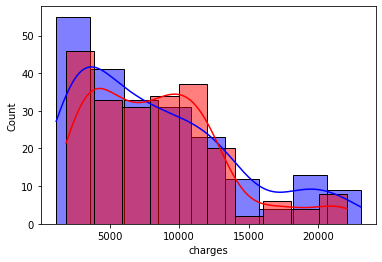

In [115]:
sns.histplot(y_test, color='blue', kde = True)
sns.histplot(y_test_pred, color='red', kde = True)

In [116]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  1542.7829281706775
Mean Squared Error:  8630388.608636174
Root Mean Squared Error:  2937.7523055281863


# KNN Regression

In [117]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed, y_train)

KNeighborsRegressor()

In [118]:
y_test_pred = regressor.predict(X_test_transformed)

In [119]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
1151,12235.8392,11757.67171
1119,5693.4305,7658.41057
588,13635.6379,12732.53161
1000,17361.7661,11854.92787
567,7256.7231,6844.11473


<AxesSubplot:xlabel='charges', ylabel='Count'>

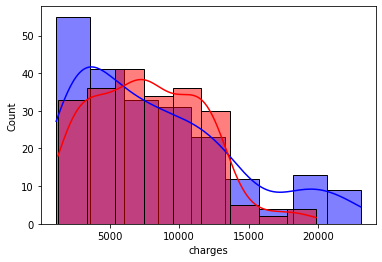

In [120]:
sns.histplot(y_test, color='blue', kde = True)
sns.histplot(y_test_pred, color='red', kde = True)

In [121]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  1998.548603074208
Mean Squared Error:  12601505.158176651
Root Mean Squared Error:  3549.859878667981


# Decision Tree Regression

In [122]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed, y_train)

DecisionTreeRegressor()

In [123]:
y_test_pred = regressor.predict(X_test_transformed)

In [124]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
1151,12235.8392,11848.14100
1119,5693.4305,7228.21565
588,13635.6379,13462.52000
1000,17361.7661,18765.87545
567,7256.7231,6875.96100


<AxesSubplot:xlabel='charges', ylabel='Count'>

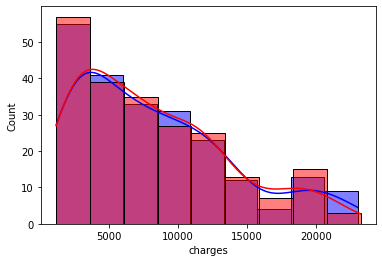

In [125]:
sns.histplot(y_test, color='blue', kde = True)
sns.histplot(y_test_pred, color='red', kde = True)

In [126]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  1527.9132428280545
Mean Squared Error:  13815059.661269024
Root Mean Squared Error:  3716.861533776719


# Random Forest Regression

In [127]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)

RandomForestRegressor()

In [128]:
y_test_pred = regressor.predict(X_test_transformed)

In [129]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
1151,12235.8392,11968.043516
1119,5693.4305,5268.546886
588,13635.6379,13496.589345
1000,17361.7661,18437.731560
567,7256.7231,7227.513747


<AxesSubplot:xlabel='charges', ylabel='Count'>

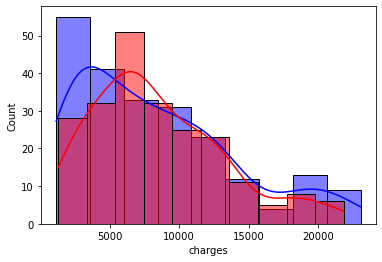

In [130]:
sns.histplot(y_test, color='blue', kde = True)
sns.histplot(y_test_pred, color='red', kde = True)

In [131]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  1482.183523956342
Mean Squared Error:  9190175.650782568
Root Mean Squared Error:  3031.5302490297813


# Gradient-boosted decision tree

In [132]:
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor()
regressor.fit(X_train_transformed, y_train)

GradientBoostingRegressor()

In [133]:
y_test_pred = regressor.predict(X_test_transformed)

In [134]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
1151,12235.8392,12308.897627
1119,5693.4305,5752.498355
588,13635.6379,13383.252603
1000,17361.7661,18263.234470
567,7256.7231,7638.047921


<AxesSubplot:xlabel='charges', ylabel='Count'>

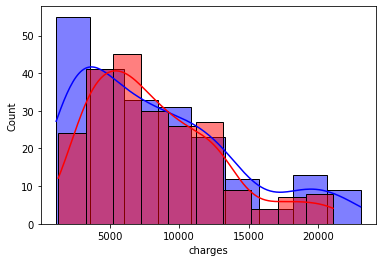

In [135]:
sns.histplot(y_test, color='blue', kde = True)
sns.histplot(y_test_pred, color='red', kde = True)

In [136]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  1434.9235824596642
Mean Squared Error:  8434221.643644366
Root Mean Squared Error:  2904.1731428488156


We are getting less error for GBDT model